# Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['AAPL','MSFT','AMD','NVDA']
start = '2012-01-01'
end = '2019-09-11'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
df.head()

,AAPL,MSFT,AMD,NVDA
Date,,,,
2012-01-03,51.269413,22.156071,5.48,12.939396
2012-01-04,51.544937,22.677486,5.46,13.086854
2012-01-05,52.117188,22.909233,5.46,13.556875
2012-01-06,52.662014,23.265116,5.43,13.400198
2012-01-09,52.578468,22.958887,5.59,13.400198


In [5]:
stock_rets = df.pct_change().dropna()

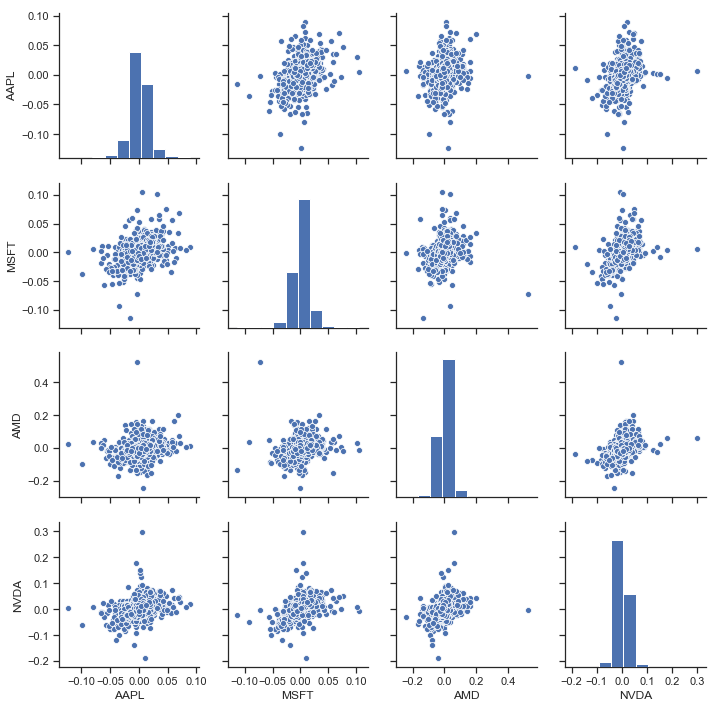

In [6]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

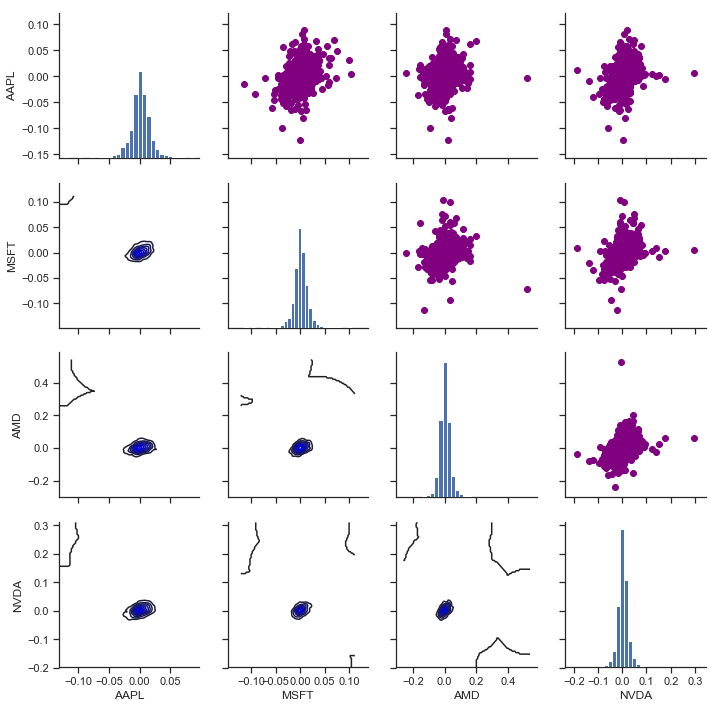

In [7]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

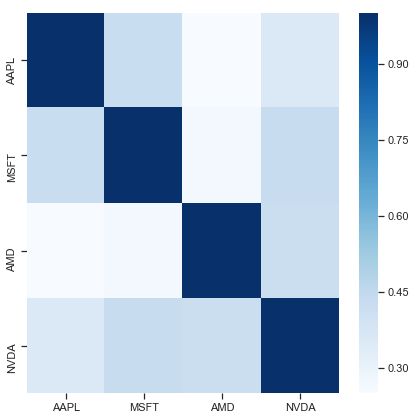

In [8]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

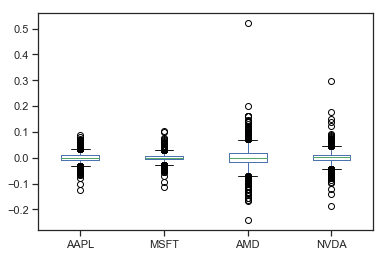

In [9]:
# Box plot
stock_rets.plot(kind='box')

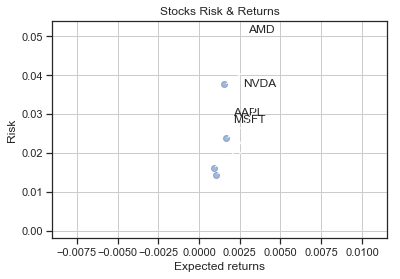

In [10]:
rets = stock_rets.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

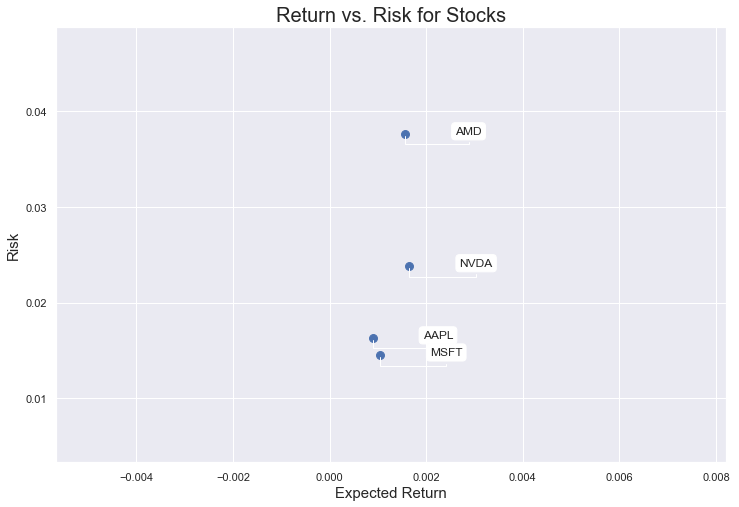

In [11]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [12]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

NVDA  NVDA    1.000000
AMD   AMD     1.000000
MSFT  MSFT    1.000000
AAPL  AAPL    1.000000
NVDA  MSFT    0.432164
MSFT  NVDA    0.432164
      AAPL    0.427538
AAPL  MSFT    0.427538
NVDA  AMD     0.420671
AMD   NVDA    0.420671
NVDA  AAPL    0.356588
AAPL  NVDA    0.356588
AMD   MSFT    0.265878
MSFT  AMD     0.265878
AMD   AAPL    0.249963
AAPL  AMD     0.249963
dtype: float64

In [13]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AAPL,MSFT,AMD,NVDA
Date,,,,
2012-01-04,0.607313,0.629373,0.311871,0.409687
2012-01-05,0.634294,0.568442,0.316641,0.460178
2012-01-06,0.631241,0.592767,0.309460,0.362422
2012-01-09,0.574527,0.461440,0.355149,0.386221
2012-01-10,0.598866,0.538173,0.344695,0.377724


In [14]:
Normalized_Value.corr()

,AAPL,MSFT,AMD,NVDA
AAPL,1.000000,0.427538,0.249963,0.356588
MSFT,0.427538,1.000000,0.265878,0.432164
AMD,0.249963,0.265878,1.000000,0.420671
NVDA,0.356588,0.432164,0.420671,1.000000


In [15]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

NVDA  NVDA    1.000000
AMD   AMD     1.000000
MSFT  MSFT    1.000000
AAPL  AAPL    1.000000
NVDA  MSFT    0.432164
MSFT  NVDA    0.432164
      AAPL    0.427538
AAPL  MSFT    0.427538
NVDA  AMD     0.420671
AMD   NVDA    0.420671
NVDA  AAPL    0.356588
AAPL  NVDA    0.356588
AMD   MSFT    0.265878
MSFT  AMD     0.265878
AMD   AAPL    0.249963
AAPL  AMD     0.249963
dtype: float64

In [16]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AAPL    0.000894
MSFT    0.001044
AMD     0.001566
NVDA    0.001654
dtype: float64
--------------------------------------------------
Stock risks:
AAPL    0.016256
MSFT    0.014467
AMD     0.037608
NVDA    0.023802
dtype: float64


In [17]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
AAPL,0.000894,0.016256
MSFT,0.001044,0.014467
AMD,0.001566,0.037608
NVDA,0.001654,0.023802


In [18]:
table.sort_values(by='Risk')

,Returns,Risk
MSFT,0.001044,0.014467
AAPL,0.000894,0.016256
NVDA,0.001654,0.023802
AMD,0.001566,0.037608


In [19]:
rf = 0.01
table['Sharpe_Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe_Ratio
AAPL,0.000894,0.016256,-0.560155
MSFT,0.001044,0.014467,-0.619107
AMD,0.001566,0.037608,-0.224260
NVDA,0.001654,0.023802,-0.350631
